# music audio tagging example

### musicnn allows predicting music tags with just two lines of code

-------

In the following, you will learn how to use `musicnn` to automatically tag your music.
To start, let's consider this music clip:

In [35]:
import glob
import os
from musicnn.tagger import top_tags
from musicnn.extractor import extractor
from musicnn.configuration import MTT_LABELS_DICT_IDX, MSD_LABELS_DICT_IDX

import deepdish as dd

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import normalize, minmax_scale


In [7]:
#file_name = './audio/joram-moments_of_clarity-08-solipsism-59-88.mp3'
#file_name = '/media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/BAIAO/3715207.ogg'
file_name = '/media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/CLASSICA/11560486.ogg'

dir_base = '/media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical'
dir_out = '/home/dirceusilva/Documentos/teste/coversbr'

dir_out_results = '/mnt/HD2T/Testes/coversbr/MTT_musicnn' #os.path.join(dir_out,'results.h5')

In [8]:

extensions = ['**/*.ogg','**/*.wav','**/*.mp3']
files = []
for e in extensions:
    files_path = os.path.join(dir_base,e)
    files.extend(glob.glob(files_path, recursive = True))

print(len(files))

840


Run these two code lines to predict the `top3` most likely tags according to our `MTT model`:

In [9]:

# 'MTT_musicnn', 'MSD_musicnn', and 'MSD_musicnn_big'.
model_type='MTT_musicnn'
if model_type == 'MSD_musicnn':
    tags_idx = MSD_LABELS_DICT_IDX
else:
    tags_idx = MTT_LABELS_DICT_IDX
    
    
# tags = top_tags(file_name, model=model_type, topN=3)
# print(tags)

-----------------------------
### Are you interested in the temporal evolution of these tags? 

Instead of predicting song-level tags, you can also plot the **Taggram**:

In [10]:
fon_by_genres = {}

for i,filename in enumerate(files):
    print(i,filename)
    taggram, tags, features = extractor(filename, model=model_type, extract_features=True)
    tags_likelihood_mean = np.mean(taggram, axis=0)
        
    #path = filename.split(os.path.sep)
    file = os.path.splitext(os.path.basename(filename))[0]
    #genre = path[-2]
    
    filepath = os.path.join(dir_out_results, file + '.h5')
    
    #if not genre in fon_by_genres:
    #    fon_by_genres[genre] = []
    
    results = {}
    results['filename'] = filename
    results['taggram'] = taggram
    results['likelihood'] = tags_likelihood_mean
    results['tags'] = tags
    results['features'] = features
        
    #fon_by_genres[genre].append(results)
    
    dd.io.save(filepath,results)

0 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/AXE MUSIC/1082109.ogg
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
1 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/AXE MUSIC/1126029.ogg
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
2 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/AXE MUSIC/1162174.ogg
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
3 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/AXE MUSIC/1176235.ogg
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
4 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/AXE MUSIC/1216661.ogg
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
5 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/AXE MUSIC/1380141.ogg
Computing spectrog

Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
48 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/BALADA/1720468.ogg
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
49 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/BALADA/2451582.ogg
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
50 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/BALADA/3097295.ogg
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
51 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/BALADA/3620015.ogg
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
52 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/BALADA/500151.ogg
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
53 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/Fonograma

Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
96 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/BOSSA NOVA/1088860.ogg
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
97 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/BOSSA NOVA/1161254.ogg
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
98 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/BOSSA NOVA/1206518.ogg
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
99 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/BOSSA NOVA/1206617.ogg
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
100 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/BOSSA NOVA/1210044.ogg
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
101 /media/dirceusilva/EAAC-94C8/BasesDados/Ge

Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
143 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/CATOLICO/3635565.ogg
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
144 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/CATOLICO/3635595.ogg
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
145 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/CATOLICO/6018612.ogg
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
146 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/CATOLICO/6018614.ogg
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
147 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/CATOLICO/6245271.ogg
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
148 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosM

Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
190 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/CLASSICA/6289253.ogg
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
191 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/COUNTRY/1088692.ogg
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
192 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/COUNTRY/1150231.ogg
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
193 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/COUNTRY/1154293.ogg
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
194 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/COUNTRY/1214430.ogg
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
195 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusic

282 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/FORRO/1775587.ogg
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
283 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/FORRO/1826081.ogg
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
284 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/FORRO/2266305.ogg
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
285 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/FORRO/5832739.ogg
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
286 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/FORRO/952597.ogg
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
287 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/FORRO/952601.ogg
Computing spectrogram (w/ libros

Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
330 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/GOSPEL/1291962.ogg
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
331 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/GOSPEL/1458666.ogg
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
332 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/GOSPEL/1524659.ogg
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
333 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/GOSPEL/1559452.ogg
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
334 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/GOSPEL/1566295.ogg
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
335 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/Fo

Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
377 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/JAZZ/1171664.ogg
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
378 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/JAZZ/1171671.ogg
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
379 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/JAZZ/1185879.ogg
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
380 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/JAZZ/1214403.ogg
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
381 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/JAZZ/1218088.ogg
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
382 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPo

Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
425 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/PAGODE/882618.ogg
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
426 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/PAGODE/942269.ogg
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
427 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/PAGODE/968904.ogg
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
428 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/PARTIDO ALTO/1013361.ogg
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
429 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/PARTIDO ALTO/1013368.ogg
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
430 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMu

Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
518 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/REGGAE/3281077.ogg
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
519 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/REGGAE/3281089.ogg
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
520 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/REGGAE/3281091.ogg
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
521 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/REGGAE/3281642.ogg
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
522 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/REGGAE/5826754.ogg
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
523 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/Fo

Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
612 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/SAMBA/5732701.ogg
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
613 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/SAMBA ENREDO/1020586.ogg
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
614 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/SAMBA ENREDO/1020677.ogg
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
615 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/SAMBA ENREDO/1022739.ogg
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
616 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/SAMBA ENREDO/1022824.ogg
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
617 /media/dirceusilva/EAAC-94C8/BasesD

Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
705 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/WORLD MUSIC/531104.ogg
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
706 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/WORLD MUSIC/5590402.ogg
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
707 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/WORLD MUSIC/5590409.ogg
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
708 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/WORLD MUSIC/5758597.ogg
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
709 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/XOTE/1002765.ogg
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
710 /media/dirceusilva/EAAC-94C8/BasesDados/G

Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
791 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/FUNK/Dina - When Your 'X' Want You Back.mp3
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. 

/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


done!


/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/deepdish/io/hdf5io.py:251: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif _pandas and isinstance(level, (pd.DataFrame, pd.Series, pd.Panel)):


792 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/FUNK/I Wanna Be The One (JCDedit).mp3
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. 

/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


done!


/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/deepdish/io/hdf5io.py:251: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif _pandas and isinstance(level, (pd.DataFrame, pd.Series, pd.Panel)):


793 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/FUNK/Nyasia - Now And Forever Version RMX By Ratolino.mp3
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. 

/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


done!


/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/deepdish/io/hdf5io.py:251: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif _pandas and isinstance(level, (pd.DataFrame, pd.Series, pd.Panel)):


794 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/FUNK/Shavonne   So tell me, tell me.mp3
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. 

/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


done!


/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/deepdish/io/hdf5io.py:251: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif _pandas and isinstance(level, (pd.DataFrame, pd.Series, pd.Panel)):


795 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/FUNK/Stevie B.- In my Eyes (Nitster Remix).mp3
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. 

/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


done!


/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/deepdish/io/hdf5io.py:251: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif _pandas and isinstance(level, (pd.DataFrame, pd.Series, pd.Panel)):


796 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/FUNK/[Ray Guell] You Took My Heart.mp3
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. 

/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


done!


/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/deepdish/io/hdf5io.py:251: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif _pandas and isinstance(level, (pd.DataFrame, pd.Series, pd.Panel)):


797 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/ROCK/01.Kings And Queens.mp3
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. 

/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


done!


/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/deepdish/io/hdf5io.py:251: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif _pandas and isinstance(level, (pd.DataFrame, pd.Series, pd.Panel)):


798 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/ROCK/02 crawl.mp3
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. 

/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


done!


/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/deepdish/io/hdf5io.py:251: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif _pandas and isinstance(level, (pd.DataFrame, pd.Series, pd.Panel)):


799 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/ROCK/nirvana - 15 - aneurysm.mp3
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. 

/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


done!


/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/deepdish/io/hdf5io.py:251: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif _pandas and isinstance(level, (pd.DataFrame, pd.Series, pd.Panel)):


800 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/ROCK/nirvana - drain you.mp3
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. 

/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


done!


/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/deepdish/io/hdf5io.py:251: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif _pandas and isinstance(level, (pd.DataFrame, pd.Series, pd.Panel)):


801 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/ROCK/nirvana - in bloom.mp3
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. 

/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


done!


/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/deepdish/io/hdf5io.py:251: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif _pandas and isinstance(level, (pd.DataFrame, pd.Series, pd.Panel)):


802 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/ROCK/nirvana - territorial pissings.mp3
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. 

/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


done!


/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/deepdish/io/hdf5io.py:251: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif _pandas and isinstance(level, (pd.DataFrame, pd.Series, pd.Panel)):


803 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/ROCK/use somebody.mp3
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. 

/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


done!


/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/deepdish/io/hdf5io.py:251: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif _pandas and isinstance(level, (pd.DataFrame, pd.Series, pd.Panel)):


804 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/HipHop/02 - MV Bill - Emiví.mp3
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. 

/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


done!


/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/deepdish/io/hdf5io.py:251: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif _pandas and isinstance(level, (pd.DataFrame, pd.Series, pd.Panel)):


805 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/HipHop/02-Subirusdoistiozin.mp3
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. 

/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


done!


/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/deepdish/io/hdf5io.py:251: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif _pandas and isinstance(level, (pd.DataFrame, pd.Series, pd.Panel)):


806 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/HipHop/03 - MV BIll - Só Deus pode me julgar.mp3
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. 

/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


done!


/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/deepdish/io/hdf5io.py:251: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif _pandas and isinstance(level, (pd.DataFrame, pd.Series, pd.Panel)):


807 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/HipHop/04-Mario¦é.mp3
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. 

/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


done!


/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/deepdish/io/hdf5io.py:251: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif _pandas and isinstance(level, (pd.DataFrame, pd.Series, pd.Panel)):


808 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/HipHop/09-Lion Man.mp3
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. 

/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


done!


/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/deepdish/io/hdf5io.py:251: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif _pandas and isinstance(level, (pd.DataFrame, pd.Series, pd.Panel)):


809 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/HipHop/Blu Cantrell- Breathe Feat Sean Paul (Alex D Intro).mp3
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. 

/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


done!


/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/deepdish/io/hdf5io.py:251: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif _pandas and isinstance(level, (pd.DataFrame, pd.Series, pd.Panel)):


810 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/HipHop/Just Like That - Zhane.mp3
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. 

/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


done!


/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/deepdish/io/hdf5io.py:251: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif _pandas and isinstance(level, (pd.DataFrame, pd.Series, pd.Panel)):


811 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/HipHop/keithsweatbarristeredit.mp3
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. 

/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


done!


/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/deepdish/io/hdf5io.py:251: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif _pandas and isinstance(level, (pd.DataFrame, pd.Series, pd.Panel)):


812 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/HipHop/Sunshine anderson - heard it all before (2).mp3
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. 

/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


done!


/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/deepdish/io/hdf5io.py:251: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif _pandas and isinstance(level, (pd.DataFrame, pd.Series, pd.Panel)):


813 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/HipHop/Wifey - Next.mp3
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. 

/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


done!


/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/deepdish/io/hdf5io.py:251: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif _pandas and isinstance(level, (pd.DataFrame, pd.Series, pd.Panel)):


814 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/POP/10 Beat It.mp3
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. 

/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


done!


/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/deepdish/io/hdf5io.py:251: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif _pandas and isinstance(level, (pd.DataFrame, pd.Series, pd.Panel)):


815 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/Piano Tenso/PON_TEN_PianoTenso01-DF.mp3
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. 

/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


done!
816 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/Piano Tenso/PON_TEN_PianoTenso02-DF.mp3


/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/deepdish/io/hdf5io.py:251: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif _pandas and isinstance(level, (pd.DataFrame, pd.Series, pd.Panel)):


Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. 

/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


done!
817 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/Piano Tenso/PON_TEN_PianoTenso03-DF.mp3


/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/deepdish/io/hdf5io.py:251: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif _pandas and isinstance(level, (pd.DataFrame, pd.Series, pd.Panel)):


Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. 

/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


done!
818 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/Piano Tenso/PON_TEN_PianoTenso04-DF.mp3


/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/deepdish/io/hdf5io.py:251: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif _pandas and isinstance(level, (pd.DataFrame, pd.Series, pd.Panel)):


Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. 

/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


done!
819 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/Piano Tenso/PON_TEN_PianoTenso05-DF.mp3


/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/deepdish/io/hdf5io.py:251: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif _pandas and isinstance(level, (pd.DataFrame, pd.Series, pd.Panel)):


Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. 

/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


done!
820 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/Piano Tenso/PON_TEN_PianoTenso06-DF.mp3


/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/deepdish/io/hdf5io.py:251: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif _pandas and isinstance(level, (pd.DataFrame, pd.Series, pd.Panel)):


Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. 

/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


done!
821 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/Piano Tenso/PON_TEN_PianoTenso07-DF.mp3


/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/deepdish/io/hdf5io.py:251: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif _pandas and isinstance(level, (pd.DataFrame, pd.Series, pd.Panel)):


Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. 

/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


done!
822 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/Piano Tenso/PON_TEN_PianoTenso08-DF.mp3


/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/deepdish/io/hdf5io.py:251: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif _pandas and isinstance(level, (pd.DataFrame, pd.Series, pd.Panel)):


Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. 

/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


done!
823 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/Piano Tenso/PON_TEN_PianoTenso09-DF.mp3


/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/deepdish/io/hdf5io.py:251: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif _pandas and isinstance(level, (pd.DataFrame, pd.Series, pd.Panel)):


Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. 

/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


done!
824 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/Piano Tenso/PON_TEN_PianoTenso10-DF.mp3


/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/deepdish/io/hdf5io.py:251: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif _pandas and isinstance(level, (pd.DataFrame, pd.Series, pd.Panel)):


Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. 

/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


done!
825 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/Piano Tenso/PON_TEN_PianoTenso11-DF.mp3


/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/deepdish/io/hdf5io.py:251: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif _pandas and isinstance(level, (pd.DataFrame, pd.Series, pd.Panel)):


Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. 

/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


done!
826 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/Piano Tenso/PON_TEN_PianoTenso12-DF.mp3


/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/deepdish/io/hdf5io.py:251: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif _pandas and isinstance(level, (pd.DataFrame, pd.Series, pd.Panel)):


Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. 

/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


done!
827 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/Piano Tenso/PON_TEN_PianoTenso13-DF.mp3


/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/deepdish/io/hdf5io.py:251: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif _pandas and isinstance(level, (pd.DataFrame, pd.Series, pd.Panel)):


Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. 

/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


done!
828 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/Piano Tenso/PON_TEN_PianoTenso14-DF.mp3


/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/deepdish/io/hdf5io.py:251: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif _pandas and isinstance(level, (pd.DataFrame, pd.Series, pd.Panel)):


Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. 

/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


done!
829 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/Piano Tenso/PON_TEN_PianoTenso15-DF.mp3


/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/deepdish/io/hdf5io.py:251: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif _pandas and isinstance(level, (pd.DataFrame, pd.Series, pd.Panel)):


Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. 

/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


done!
830 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/Piano Tenso/PON_TEN_PianoTenso16-DF.mp3


/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/deepdish/io/hdf5io.py:251: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif _pandas and isinstance(level, (pd.DataFrame, pd.Series, pd.Panel)):


Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. 

/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


done!
831 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/Piano Tenso/PON_TEN_PianoTenso17-DF.mp3


/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/deepdish/io/hdf5io.py:251: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif _pandas and isinstance(level, (pd.DataFrame, pd.Series, pd.Panel)):


Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. 

/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


done!
832 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/Piano Tenso/PON_TEN_PianoTenso18-DF.mp3


/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/deepdish/io/hdf5io.py:251: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif _pandas and isinstance(level, (pd.DataFrame, pd.Series, pd.Panel)):


Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. 

/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


done!
833 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/Piano Tenso/PON_TEN_PianoTenso19-DF.mp3


/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/deepdish/io/hdf5io.py:251: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif _pandas and isinstance(level, (pd.DataFrame, pd.Series, pd.Panel)):


Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. 

/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


done!
834 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/Piano Tenso/PON_TEN_PianoTenso20-DF.mp3


/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/deepdish/io/hdf5io.py:251: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif _pandas and isinstance(level, (pd.DataFrame, pd.Series, pd.Panel)):


Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. 

/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


done!
835 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/Piano Tenso/PON_TEN_PianoTenso21-DF.mp3


/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/deepdish/io/hdf5io.py:251: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif _pandas and isinstance(level, (pd.DataFrame, pd.Series, pd.Panel)):


Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. 

/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


done!
836 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/Piano Tenso/PON_TEN_PianoTenso22-DF.mp3


/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/deepdish/io/hdf5io.py:251: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif _pandas and isinstance(level, (pd.DataFrame, pd.Series, pd.Panel)):


Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. 

/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


done!
837 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/Piano Tenso/PON_TEN_PianoTenso23-DF.mp3


/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/deepdish/io/hdf5io.py:251: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif _pandas and isinstance(level, (pd.DataFrame, pd.Series, pd.Panel)):


Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. 

/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


done!
838 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/Piano Tenso/PON_TEN_PianoTenso24-DF.mp3


/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/deepdish/io/hdf5io.py:251: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif _pandas and isinstance(level, (pd.DataFrame, pd.Series, pd.Panel)):


Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. 

/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


done!
839 /media/dirceusilva/EAAC-94C8/BasesDados/GenerosMusicais/FonogramasPorGeneroMusical/Piano Tenso/TEN_Piano Tenso-DF.mp3


/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/deepdish/io/hdf5io.py:251: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif _pandas and isinstance(level, (pd.DataFrame, pd.Series, pd.Panel)):


Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. 

/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


done!


/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/deepdish/io/hdf5io.py:251: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif _pandas and isinstance(level, (pd.DataFrame, pd.Series, pd.Panel)):


In [15]:

fon_by_genres = {}

files_path = os.path.join(dir_out_results,'**/*.h5')

for filepath in glob.iglob(files_path, recursive = True):
    
    print(filepath)
    
    fonogram = dd.io.load(filepath)
    filename = fonogram['filename']
    
    path = filename.split(os.path.sep)
    genre = path[-2]
    #file = os.path.splitext(os.path.basename(filename))[0]

    if not genre in list(fon_by_genres.keys()):
        fon_by_genres[genre] = []
        
    fon_by_genres[genre].append(filepath)
    
    
print(list(fon_by_genres.keys()))

/mnt/HD2T/Testes/coversbr/MTT_musicnn/TEN_Piano Tenso-DF.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/PON_TEN_PianoTenso24-DF.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/PON_TEN_PianoTenso23-DF.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/PON_TEN_PianoTenso22-DF.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/PON_TEN_PianoTenso21-DF.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/PON_TEN_PianoTenso20-DF.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/PON_TEN_PianoTenso19-DF.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/PON_TEN_PianoTenso18-DF.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/PON_TEN_PianoTenso17-DF.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/PON_TEN_PianoTenso16-DF.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/PON_TEN_PianoTenso15-DF.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/PON_TEN_PianoTenso14-DF.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/PON_TEN_PianoTenso13-DF.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/PON_TEN_PianoTenso12-DF.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/PON_TEN_PianoTenso11-DF.h5
/mnt/HD2T/Testes/coversbr/MTT_

/mnt/HD2T/Testes/coversbr/MTT_musicnn/1540133.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/1519658.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/1491843.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/1450545.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/1423800.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/1337020.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/1286529.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/1052455.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/1002765.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/5758597.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/5590409.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/5590402.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/531104.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/3097289.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/2726357.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/2726286.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/2415718.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/2158296.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/1741208.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/1663710.h5
/mnt/HD2T/Testes/cove

/mnt/HD2T/Testes/coversbr/MTT_musicnn/10748282.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/1041803.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/852280.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/6281901.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/5762999.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/3253728.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/2942483.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/2942480.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/1831004.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/1831003.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/1830999.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/1830998.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/1754968.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/1754963.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/1578249.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/1566141.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/1536205.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/1464061.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/1399240.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/1366954.h5
/mnt/HD2T/Testes/cov

/mnt/HD2T/Testes/coversbr/MTT_musicnn/1218088.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/1214403.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/1185879.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/1171671.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/1171664.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/11428676.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/11335845.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/1107259.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/1083516.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/1076249.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/10387292.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/1020823.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/1020818.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/1020812.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/957163.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/956340.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/50605.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/4134474.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/3344790.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/3344786.h5
/mnt/HD2T/Testes/cove

/mnt/HD2T/Testes/coversbr/MTT_musicnn/1087937.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/1087935.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/1034899.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/968634.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/968633.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/593911.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/1808071.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/1749488.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/1601004.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/1556208.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/1555578.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/1539253.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/1453927.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/1406492.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/1386831.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/1382556.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/1348227.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/1333641.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/1225079.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/1214430.h5
/mnt/HD2T/Testes/covers

/mnt/HD2T/Testes/coversbr/MTT_musicnn/1662002.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/1581285.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/1576634.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/1576628.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/1576529.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/1519662.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/1484693.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/1341460.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/1154302.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/1154294.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/1068997.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/1045540.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/48656.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/3715218.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/3715212.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/3715211.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/3715207.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/3715205.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/3097288.h5
/mnt/HD2T/Testes/coversbr/MTT_musicnn/2632999.h5
/mnt/HD2T/Testes/cover

## Cria vetor de likelihoods

In [61]:
genres = list(fon_by_genres.keys())

seq_fon = [] 
seq_genres = []
likelihood = []
penultimate = []

for g in genres:
    for f in fon_by_genres[g]:
        
        fonogram = dd.io.load(f)
        LLK = fonogram['likelihood']
        embedded = fonogram['features']['penultimate']
        
        seq_fon.append(os.path.basename(fonogram['filename']))
        seq_genres.append(g)
        
        likelihood.append(LLK) #[tags_idx['genre']])
        penultimate.append(embedded)
        
        
likelihood = np.asarray(likelihood)
penultimate = np.asarray(penultimate)


In [74]:
dd.io.save('vectors_' + model_type + '.npy',(likelihood,penultimate, seq_fon, seq_genres))



/home/dirceusilva/.pyenv/versions/3.7.8/envs/article/lib/python3.7/site-packages/deepdish/io/hdf5io.py:251: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif _pandas and isinstance(level, (pd.DataFrame, pd.Series, pd.Panel)):


## Leitura Arquivos

In [77]:
likelihood,penultimate, seq_fon, seq_genres = dd.io.load('vectors_' + model_type + '.npy')
    
print(penultimate[0].shape)
print(len(seq_fon))

(39, 200)
840
['Piano Tenso', 'Piano Tenso', 'Piano Tenso', 'Piano Tenso', 'Piano Tenso', 'Piano Tenso', 'Piano Tenso', 'Piano Tenso', 'Piano Tenso', 'Piano Tenso']


## Normalização

In [ ]:
likelihood = minmax_scale(likelihood, axis=1)

## Cálculo conforme artigo DA-Tacos

In [73]:
def f_measure(u,v, pct=1.0, topN=10):
    
    u_idx = u.argsort()[-topN:][::-1]
    v_idx = v.argsort()[-topN:][::-1]
    
    #u_pct = np.percentile(u, 90)
    #v_pct = np.percentile(v, 90)
        
    #u_idx = list(np.where(u >= pct)[0])   
    #v_idx = list(np.where(v >= pct)[0])

    common = set(u_idx).intersection(v_idx)
    
    if len(common) > 0:
        if len(u) > 0 and len(v) > 0:
            p = len(common)/len(u_idx)
            r = len(common)/len(v_idx)
        else:
            return 0.0
    
        return 2*p*r/(p+r) 
    else:
        return 0.0


def fmetric(p,top):
    return lambda u, v: f_measure(u,v,p,top)


## Cálculo de Distância e cria vetor de true_scores e false_scores

In [55]:
pct = np.percentile(likelihood.flatten(), 90)
topN = 10

D = squareform(pdist(likelihood, metric='euclidean'))

same = []
impostor = []

for i in range(D.shape[0]):
    for j in range(i+1,D.shape[1]):
        if seq_genres[i] == seq_genres[j]:
            same.append(D[i,j])
        else:
            impostor.append(D[i,j])

            
true_scores = np.array(same)
false_scores = np.array(impostor)

## Funções para plotagem do DET

In [56]:
def __DETsort__(x, col=''):
    """DETsort Sort rows, the first in ascending, the remaining in descending
    thereby postponing the false alarms on like scores.
    based on SORTROWS
    
    :param x: the array to sort
    :param col: not used here

    :return: a sorted vector of scores
    """
    assert x.ndim > 1, 'x must be a 2D matrix'
    if col == '':
        list(range(1, x.shape[1]))

    ndx = np.arange(x.shape[0])

    # sort 2nd column ascending
    ind = np.argsort(x[:, 1], kind='mergesort')
    ndx = ndx[ind]

    # reverse to descending order
    ndx = ndx[::-1]

    # now sort first column ascending
    ind = np.argsort(x[ndx, 0], kind='mergesort')

    ndx = ndx[ind]
    sort_scores = x[ndx, :]
    return sort_scores

def __compute_roc__(true_scores, false_scores):
    """Computes the (observed) miss/false_alarm probabilities
    for a set of detection output scores.
    
    true_scores (false_scores) are detection output scores for a set of
    detection trials, given that the target hypothesis is true (false).
    (By convention, the more positive the score,
    the more likely is the target hypothesis.)
    
    :param true_scores: a 1D array of target scores
    :param false_scores: a 1D array of non-target scores

    :return: a tuple of two vectors, Pmiss,Pfa
    """
    num_true = true_scores.shape[0]
    num_false = false_scores.shape[0]
    assert num_true > 0, "Vector of target scores is empty"
    assert num_false > 0, "Vector of nontarget scores is empty"

    total = num_true + num_false

    Pmiss = np.zeros((total + 1))
    Pfa = np.zeros((total + 1))

    scores = np.zeros((total, 2))
    scores[:num_false, 0] = false_scores
    scores[:num_false, 1] = 0
    scores[num_false:, 0] = true_scores
    scores[num_false:, 1] = 1

    scores = __DETsort__(scores)

    sumtrue = np.cumsum(scores[:, 1], axis=0)
    sumfalse = num_false - (np.arange(1, total + 1) - sumtrue)

    Pmiss[0] = 0
    Pfa[0] = 1
    Pmiss[1:] = sumtrue / num_true
    Pfa[1:] = sumfalse / num_false
    return Pmiss, Pfa

def DETCurve(true_scores, false_scores):
    """
    Given false positive and false negative rates, produce a DET Curve.
    The false positive rate is assumed to be increasing while the false
    negative rate is assumed to be decreasing.
    """

    fns, fps = __compute_roc__(true_scores, false_scores)

    axis_min = min(fps[0],fns[-1])

    #plt.figure()
    fig,ax = plt.subplots()
    plt.plot(fps,fns)
    plt.yscale('log')
    plt.xscale('log')
    ticks_to_use = [0.001,0.002,0.005,0.01,0.02,0.05,0.1,0.2,0.5,1,2,5,10,20,50]
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax.set_xticks(ticks_to_use)
    ax.set_yticks(ticks_to_use)
    plt.axis([0.001,50,0.001,50])

## Ploagem da curva DET

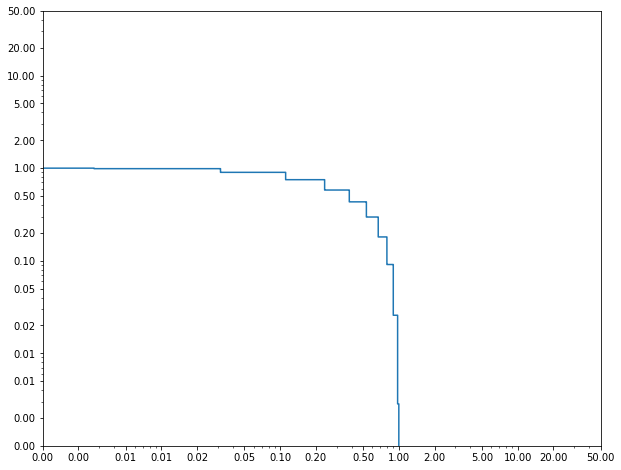

In [57]:
 
    
# same_bin = np.zeros((len(same),))
# impostor_bin = np.ones((len(impostor),))

# y_true = np.concatenate((same_bin,impostor_bin))
# y_score = np.concatenate((np.array(same),np.array(impostor)))

DETCurve(true_scores, false_scores)

#plt.show()

## Plotagem de histograma

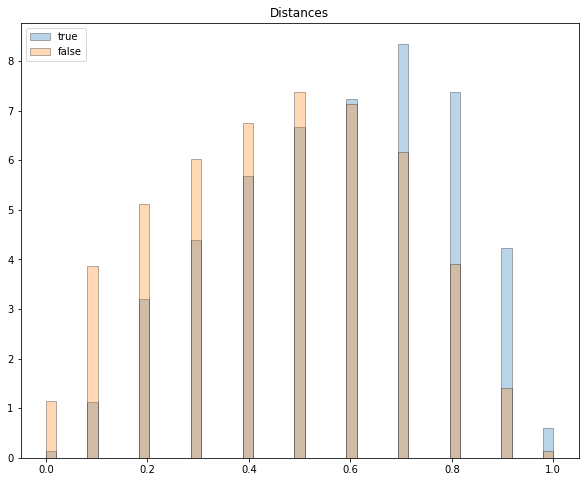

In [59]:

plt.figure()

plt.rcParams["figure.figsize"] = (10,8) 


minbin, maxbin = 0.0,1.0
bins = np.linspace(minbin, maxbin, 50)

kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=bins, ec="k")

plt.hist(true_scores,label='true', **kwargs)
plt.hist(false_scores,label='false', **kwargs)
plt.legend(loc='upper left')
plt.title('Distances')

plt.show()


In [ ]:
in_length = 3 # seconds  by default, the model takes inputs of 3 seconds with no overlap

plt.rcParams["figure.figsize"] = (10,8) # set size of the figures
fontsize = 12 # set figures font size

In [ ]:
fig, ax = plt.subplots()

taggram = results[0]['taggram']
tags = results[0]['tags']

# title
ax.title.set_text('Taggram')
ax.title.set_fontsize(fontsize)

# x-axis title
ax.set_xlabel('(seconds)', fontsize=fontsize)

# y-axis
y_pos = np.arange(len(tags))
ax.set_yticks(y_pos)
ax.set_yticklabels(tags, fontsize=fontsize-1)

# x-axis
x_pos = np.arange(taggram.shape[0])
x_label = np.arange(in_length/2, in_length*taggram.shape[0], 3)
ax.set_xticks(x_pos)
ax.set_xticklabels(x_label, fontsize=fontsize)

# depict taggram
ax.imshow(taggram.T, interpolation=None, aspect="auto")
plt.show()

----------------------------------
### How did we compute the top3 tags?

Note that the Taggram can be interpreted as the temporal evolution of the tags likelihood.

From the Taggram, we can compute the **song-level tags likelihood** by simply averaging through time:

In [ ]:
tags_likelihood_mean = np.mean(taggram, axis=0) # averaging the Taggram through time 

This song-level tags likelihood has the following shape:

In [ ]:
fig, ax = plt.subplots()

# title
ax.title.set_text('Tags likelihood (mean of the taggram)')
ax.title.set_fontsize(fontsize)

# y-axis title
ax.set_ylabel('(likelihood)', fontsize=fontsize)

# y-axis
ax.set_ylim((0, 1))
ax.tick_params(axis="y", labelsize=fontsize)

# x-axis
ax.tick_params(axis="x", labelsize=fontsize-1)
pos = np.arange(len(tags))
ax.set_xticks(pos)
ax.set_xticklabels(tags, rotation=90)

# depict song-level tags likelihood
ax.bar(pos, tags_likelihood_mean)
plt.show()

From the above tags likelihood, the `top_tag()` function computes the **top3** tags.